In [4]:
import os

import matplotlib.pyplot as plt
import pandas
import numpy
import matplotlib
from env import *
from visualiser import *
from main import *
from constants import *
import xlsxwriter
%matplotlib inline

In [5]:
env = Env(
	width=ENV_SIZE, height=ENV_SIZE, goal_x=GOAL_X, goal_y=GOAL_Y, N=ROBOT_NUMBER,
	desired_X=DX, desired_Y=DY, leader_x=XL, leader_y=YL, robot_radius=ROBOT_RADIUS,
	buffer_size=MAX_T
)

0
[0.0, 1, 9, 0.0, 141, 0.014, 0, 139]
1
[0.1, 1, 9, 0.0, 160, 0.014105341979559727, 158, 139]
2
[0.2, 1, 9, 0.0, 141, 0.014210675312893063, 79, 139]
3
[0.30000000000000004, 1, 9, 0.0, 141, 0.014314979000915514, 52, 139]
4
[0.4, 1, 9, 0.0, 141, 0.014418979000915507, 39, 140]
5
[0.5, 1, 9, 0.0, 141, 0.01452313084492674, 31, 139]
6
[0.6000000000000001, 1, 9, 0.0, 141, 0.014626979000915514, 27, 140]
7
[0.7000000000000001, 1, 9, 0.0, 141, 0.014729949355604646, 22, 139]
8
[0.8, 1, 9, 0.0, 141, 0.014835586376960428, 19, 140]
9
[0.9, 1, 9, 0.0, 141, 0.0149354345329492, 17, 139]
10
[1.0, 1, 9, 0.0, 141, 0.015043890064982877, 15, 139]
11
[1.1, 1, 9, 0.0, 141, 0.015140616022271309, 14, 139]
12
[1.2000000000000002, 1, 9, 0.0, 141, 0.015250979000915519, 13, 140]
13
[1.3, 1, 9, 0.0, 141, 0.015354979000915515, 12, 140]
14
[1.4000000000000001, 1, 9, 0.0, 141, 0.015448616022271305, 11, 139]
15
[1.5, 1, 9, 0.0, 141, 0.015543890064982864, 10, 140]
16
[1.6, 1, 9, 0.0, 141, 0.015668801129050218, 9, 139]
1

D:\Users\ABZZA~1.DES\AppData\Local\Temp/ipykernel_13508/1273160858.py:24: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel(os.path.join(directory, 'report.xls'))


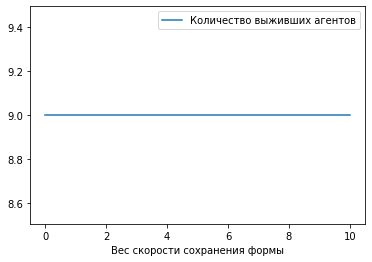

In [6]:

directory = '_run_w1'
if not os.path.exists(directory):
	os.makedirs(directory)

df = pandas.DataFrame(
	columns=['id', 'Вес скорости сохранения формы', 'Вес скорости достижения цели', 'Количество выживших агентов',
	         'Расстояние между виртуальным лидером и целевой точки', 'Количество итерации', 'Средний скорость', 'Время достижения формы', 'Время достижения цели']
	)
df.set_index('id', inplace=True)

w2 = 1
run = 0
for w1 in numpy.linspace(0, 10, 101):
	print(run)
	env.episode(w1, w2, reset_to_line=True)
	# episode_gui(env, w1, w2, w3)

	row = [w1, w2, alive_agent_count(env), leader_goal_distance(env), env.t, meanV(env.v_history), env.tForm, env.tGoal]
	df.loc[run] = row
	print(row)
	env.save_episode(os.path.join(directory, str(run)))
	run = run + 1
df.plot(x=df.columns[0], y=df.columns[2])
df.to_excel(os.path.join(directory, 'report.xls'))

0
[1, 0.0, 9, 140.0, 17, 0.0010438900649828774, 15, 0]
1
[1, 0.1, 9, 0.0, 1401, 0.002443890064982892, 15, 1400]
2
[1, 0.2, 9, 0.0, 701, 0.003843890064982869, 34, 700]
3
[1, 0.30000000000000004, 9, 0.0, 468, 0.005241890064982856, 23, 466]
4
[1, 0.4, 9, 0.0, 351, 0.00664389006498277, 15, 349]
5
[1, 0.5, 9, 0.0, 281, 0.008043890064982878, 15, 279]
6
[1, 0.6000000000000001, 9, 0.0, 235, 0.009435890064982926, 15, 233]
7
[1, 0.7000000000000001, 9, 0.0, 201, 0.01084389006498286, 15, 200]
8
[1, 0.8, 9, 0.0, 176, 0.01224389006498284, 15, 174]
9
[1, 0.9, 9, 0.0, 157, 0.013623890064982814, 15, 155]
10
[1, 1.0, 9, 0.0, 141, 0.015043890064982877, 15, 139]
11
[1, 1.1, 9, 0.0, 129, 0.01641989006498291, 15, 127]
12
[1, 1.2000000000000002, 9, 0.0, 118, 0.01781189006498291, 15, 116]
13
[1, 1.3, 9, 0.0, 109, 0.019207890064982854, 15, 107]
14
[1, 1.4000000000000001, 9, 0.0, 101, 0.020643890064982774, 15, 99]
15
[1, 1.5, 9, 0.0, 95, 0.02199389006498288, 15, 93]
16
[1, 1.6, 9, 0.0, 89, 0.023379890064982947,

D:\Users\ABZZA~1.DES\AppData\Local\Temp/ipykernel_13508/3226851432.py:23: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel(os.path.join(directory, 'report.xls'))


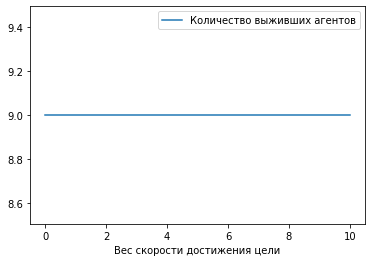

In [7]:

directory = '_run_w2'
if not os.path.exists(directory):
	os.makedirs(directory)

df = pandas.DataFrame(
	columns=['id', 'Вес скорости сохранения формы', 'Вес скорости достижения цели', 'Количество выживших агентов',
	         'Расстояние между виртуальным лидером и целевой точки', 'Количество итерации', 'Средний скорость', 'Время достижения формы', 'Время достижения цели']
	)
df.set_index('id', inplace=True)

w1 = 1
run = 0
for w2 in numpy.linspace(0, 10, 101):
	print(run)
	env.episode(w1, w2, reset_to_line=True)
	# episode_gui(env, w1, w2, w3)
	row = [w1, w2, alive_agent_count(env), leader_goal_distance(env), env.t, meanV(env.v_history), env.tForm, env.tGoal]
	df.loc[run] = row
	print(row)
	env.save_episode(os.path.join(directory, str(run)))
	run = run + 1
df.plot(x=df.columns[1], y=df.columns[2])
df.to_excel(os.path.join(directory, 'report.xls'))

0
[0.0, 5, 9, 0.0, 29, 0.07, 0, 27]
1
[0.1, 5, 9, 0.0, 160, 0.07010534197955968, 158, 27]
2
[0.2, 5, 9, 0.0, 81, 0.07021067531289309, 79, 27]
3
[0.30000000000000004, 5, 9, 0.0, 54, 0.07031497900091552, 52, 27]
4
[0.4, 5, 9, 0.0, 41, 0.07041897900091554, 39, 27]
5
[0.5, 5, 9, 0.0, 33, 0.07052313084492676, 31, 28]
6
[0.6000000000000001, 5, 9, 0.0, 29, 0.0706269790009155, 26, 27]
7
[0.7000000000000001, 5, 9, 0.0, 29, 0.07072994935560463, 22, 27]
8
[0.8, 5, 9, 0.0, 29, 0.07083558637696037, 19, 28]
9
[0.9, 5, 9, 0.0, 29, 0.0709354345329492, 17, 27]
10
[1.0, 5, 9, 0.0, 29, 0.07104389006498288, 15, 27]
11
[1.1, 5, 9, 0.0, 29, 0.07114061602227127, 14, 28]
12
[1.2000000000000002, 5, 9, 0.0, 29, 0.07125097900091551, 13, 27]
13
[1.3, 5, 9, 0.0, 29, 0.07135497900091552, 12, 27]
14
[1.4000000000000001, 5, 9, 0.0, 29, 0.07144861602227129, 11, 28]
15
[1.5, 5, 9, 0.0, 29, 0.07154389006498288, 10, 27]
16
[1.6, 5, 9, 0.0, 29, 0.07166880112905022, 9, 27]
17
[1.7000000000000002, 5, 9, 0.0, 29, 0.071751434

D:\Users\ABZZA~1.DES\AppData\Local\Temp/ipykernel_13508/2727903533.py:24: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel(os.path.join(directory, 'report.xls'))


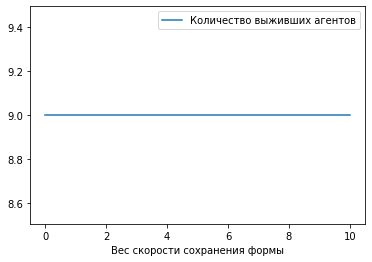

In [8]:

directory = '_run_w15'
if not os.path.exists(directory):
	os.makedirs(directory)

df = pandas.DataFrame(
	columns=['id', 'Вес скорости сохранения формы', 'Вес скорости достижения цели', 'Количество выживших агентов',
	         'Расстояние между виртуальным лидером и целевой точки', 'Количество итерации', 'Средний скорость', 'Время достижения формы', 'Время достижения цели']
	)
df.set_index('id', inplace=True)

w2 = 5
run = 0
for w1 in numpy.linspace(0, 10, 101):
	print(run)
	env.episode(w1, w2, reset_to_line=True)
	# episode_gui(env, w1, w2, w3)

	row = [w1, w2, alive_agent_count(env), leader_goal_distance(env), env.t, meanV(env.v_history), env.tForm, env.tGoal]
	df.loc[run] = row
	print(row)
	env.save_episode(os.path.join(directory, str(run)))
	run = run + 1
df.plot(x=df.columns[0], y=df.columns[2])
df.to_excel(os.path.join(directory, 'report.xls'))

0
[1, 0.0, 9, 140.0, 17, 0.0010438900649828774, 15, 0]
1
[1, 0.1, 9, 0.0, 1401, 0.002443890064982892, 15, 1400]
2
[1, 0.2, 9, 0.0, 701, 0.003843890064982869, 34, 700]
3
[1, 0.30000000000000004, 9, 0.0, 468, 0.005241890064982856, 23, 466]
4
[1, 0.4, 9, 0.0, 351, 0.00664389006498277, 15, 349]
5
[1, 0.5, 9, 0.0, 281, 0.008043890064982878, 15, 279]
6
[1, 0.6000000000000001, 9, 0.0, 235, 0.009435890064982926, 15, 233]
7
[1, 0.7000000000000001, 9, 0.0, 201, 0.01084389006498286, 15, 200]
8
[1, 0.8, 9, 0.0, 176, 0.01224389006498284, 15, 174]
9
[1, 0.9, 9, 0.0, 157, 0.013623890064982814, 15, 155]
10
[1, 1.0, 9, 0.0, 141, 0.015043890064982877, 15, 139]
11
[1, 1.1, 9, 0.0, 129, 0.01641989006498291, 15, 127]
12
[1, 1.2000000000000002, 9, 0.0, 118, 0.01781189006498291, 15, 116]
13
[1, 1.3, 9, 0.0, 109, 0.019207890064982854, 15, 107]
14
[1, 1.4000000000000001, 9, 0.0, 101, 0.020643890064982774, 15, 99]
15
[1, 1.5, 9, 0.0, 95, 0.02199389006498288, 15, 93]
16
[1, 1.6, 9, 0.0, 89, 0.023379890064982947,

D:\Users\ABZZA~1.DES\AppData\Local\Temp/ipykernel_13508/4133813215.py:23: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel(os.path.join(directory, 'report.xls'))


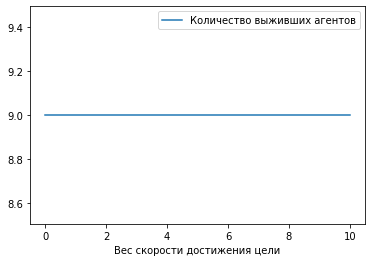

In [9]:

directory = '_run_w25'
if not os.path.exists(directory):
	os.makedirs(directory)

df = pandas.DataFrame(
	columns=['id', 'Вес скорости сохранения формы', 'Вес скорости достижения цели', 'Количество выживших агентов',
	         'Расстояние между виртуальным лидером и целевой точки', 'Количество итерации', 'Средний скорость', 'Время достижения формы', 'Время достижения цели']
	)
df.set_index('id', inplace=True)

w1 = 1
run = 0
for w2 in numpy.linspace(0, 10, 101):
	print(run)
	env.episode(w1, w2, reset_to_line=True)
	# episode_gui(env, w1, w2, w3)
	row = [w1, w2, alive_agent_count(env), leader_goal_distance(env), env.t, meanV(env.v_history), env.tForm, env.tGoal]
	df.loc[run] = row
	print(row)
	env.save_episode(os.path.join(directory, str(run)))
	run = run + 1
df.plot(x=df.columns[1], y=df.columns[2])
df.to_excel(os.path.join(directory, 'report.xls'))

In [10]:
#current_episode_replay(env)
directory = '_run_w1'
show_episode(directory, 98)

In [11]:
full_report = 'report.xls'
writer = pandas.ExcelWriter(full_report, engine='xlsxwriter')



#workbook.close()








w2=1
w3=1

Index(['Вес скорости сохранения формы', 'Вес скорости достижения цели',
       'Количество выживших агентов',
       'Расстояние между виртуальным лидером и целевой точки',
       'Количество итерации', 'Средний скорость', 'Время достижения формы',
       'Время достижения цели'],
      dtype='object')


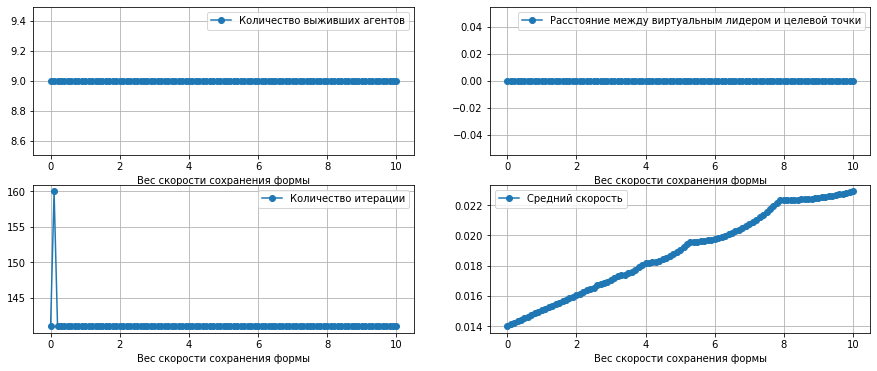

In [12]:
fill_report_with_graph('_run_w1', 0, writer=writer)
# df=pandas.read_excel('_run_w1/report.xls')
# df.plot(x=df.columns[2] , y=df.columns[5], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[2] , y=df.columns[6], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[2] , y=df.columns[7], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[2] , y=df.columns[8], figsize=(15, 6), marker='o', grid=True)

w1=1
w3=1

Index(['Вес скорости сохранения формы', 'Вес скорости достижения цели',
       'Количество выживших агентов',
       'Расстояние между виртуальным лидером и целевой точки',
       'Количество итерации', 'Средний скорость', 'Время достижения формы',
       'Время достижения цели'],
      dtype='object')


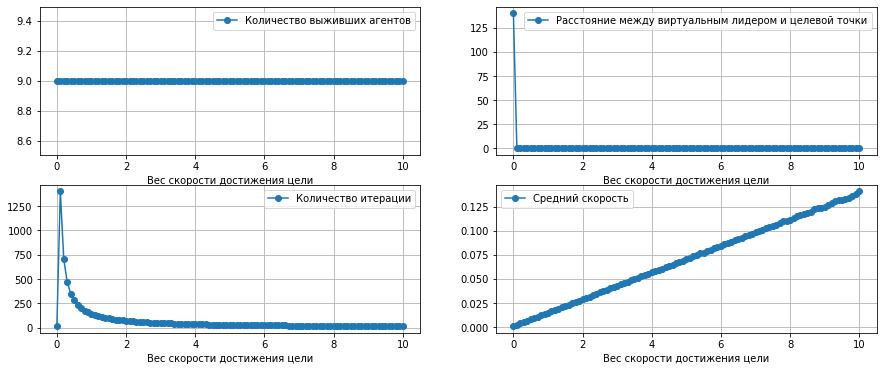

In [13]:
fill_report_with_graph('_run_w2', 1,  writer=writer)

# df=pandas.read_excel('_run_w2/report.xls')
# df.plot(x=df.columns[3] , y=df.columns[5], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[3] , y=df.columns[6], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[3] , y=df.columns[7], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[3] , y=df.columns[8], figsize=(15, 6), marker='o', grid=True)

w1=5
w3=1

Index(['Вес скорости сохранения формы', 'Вес скорости достижения цели',
       'Количество выживших агентов',
       'Расстояние между виртуальным лидером и целевой точки',
       'Количество итерации', 'Средний скорость', 'Время достижения формы',
       'Время достижения цели'],
      dtype='object')


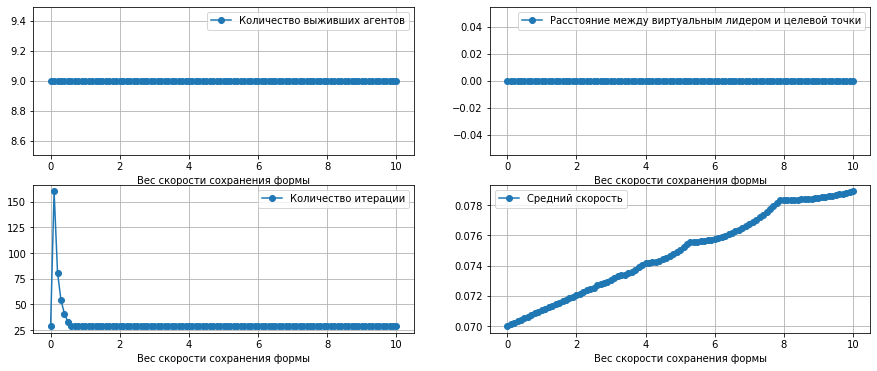

In [14]:
fill_report_with_graph('_run_w15', 0,  writer=writer)

# df=pandas.read_excel('_run_w2_w15/report.xls')
# df.plot(x=df.columns[3] , y=df.columns[5], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[3] , y=df.columns[6], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[3] , y=df.columns[7], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[3] , y=df.columns[8], figsize=(15, 6), marker='o', grid=True)

w1=1
w2=1

Index(['Вес скорости сохранения формы', 'Вес скорости достижения цели',
       'Количество выживших агентов',
       'Расстояние между виртуальным лидером и целевой точки',
       'Количество итерации', 'Средний скорость', 'Время достижения формы',
       'Время достижения цели'],
      dtype='object')


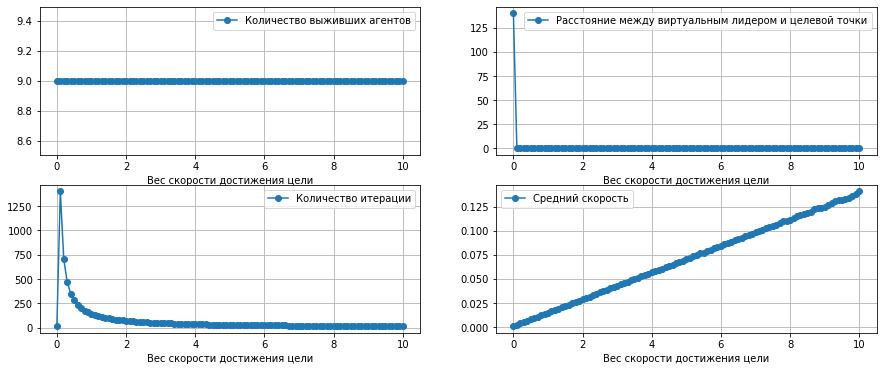

In [15]:
fill_report_with_graph('_run_w25', 1, writer=writer)

# df=pandas.read_excel('_run_w3/report.xls')
# df.plot(x=df.columns[4] , y=df.columns[5], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[4] , y=df.columns[6], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[4] , y=df.columns[7], figsize=(15, 6), marker='o', grid=True)
# df.plot(x=df.columns[4] , y=df.columns[8], figsize=(15, 6), marker='o', grid=True)

w1=1
w2=0

In [16]:
writer.close()


In [17]:
current_episode_replay(env)